## Gini Index

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris().data
target = load_iris().target

## Gini Index using load iris dataset

In [2]:
# gini index
columns, counts = np.unique(target, return_counts=True)

In [7]:
def gini_index(target):
  # gini index
  columns, counts = np.unique(target, return_counts=True)
  probability = counts / counts.sum()
  gini = 1 - np.sum(probability**2)
  return gini

result = gini_index(target)
print(f'Gini Index of the dataset is {result:.4f}')

Gini Index of the dataset is 0.6667


## Gini Index using hardcoded data

In [ ]:
data

,Age,Gender,Income,Credit Score,Buys_insurance
0,20,Male,High,Excellent,Yes
1,25,Female,High,Fair,No
2,30,Male,High,Excellent,Yes
3,35,Female,Medium,Excellent,Yes
4,40,Male,Low,Fair,No
5,45,Female,Low,Poor,Yes


In [ ]:
gini_index(data.Buys_insurance)

0.4444444444444444

In [ ]:
data['Credit Score'] = data['Credit Score'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data["Income"] = data["Income"].map({'Low': 0, 'Medium': 1, 'High': 2})
data["Buys_insurance"] = data["Buys_insurance"].map({'Yes': 1, 'No': 0})

Accuracy: 0.00


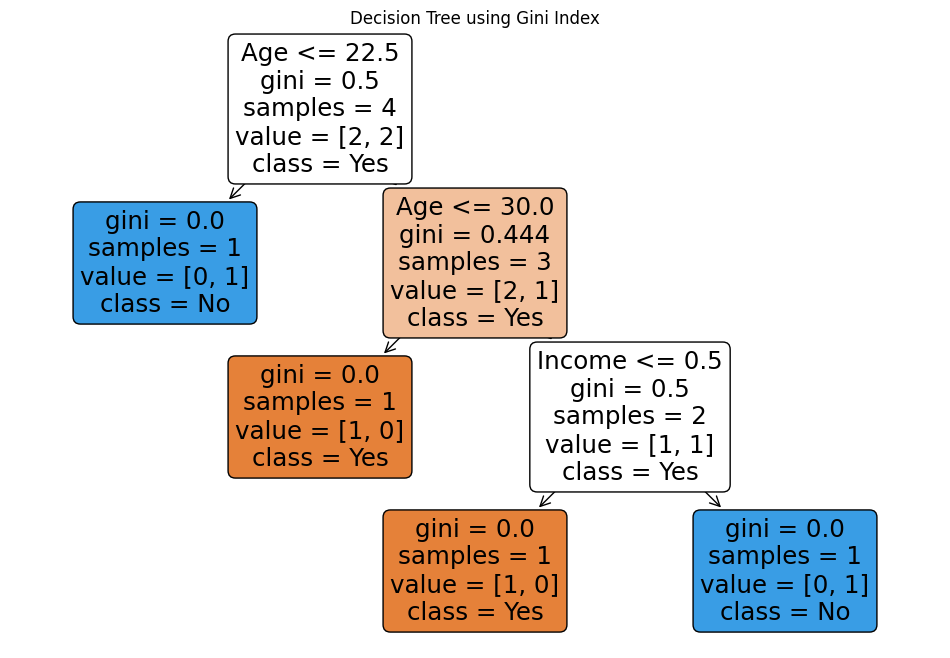

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# data = load_iris()
X = data.drop('Buys_insurance', axis=1)
y = data['Buys_insurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Yes", "No"], rounded=True)
plt.title('Decision Tree using Gini Index')
plt.show()
